In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

Loading in the data

In [3]:
np.random.seed(2024)

# Loading in the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

Calculating the accuracy score as a function of the learning rate and saving the results

In [4]:
N = 500
learning_rates = np.logspace(-4, -1, N)
scores = np.zeros(N)

for idx, lr in enumerate(learning_rates):
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', MLPClassifier(hidden_layer_sizes=(50,), 
                                max_iter=50, 
                                random_state=2024, 
                                learning_rate_init=lr, 
                                batch_size=10, 
                                activation='logistic'))
    ])

    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)

    scores[idx] = score

c:\Users\maria\anaconda3\envs\fysstk3155\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\maria\anaconda3\envs\fysstk3155\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\maria\anaconda3\envs\fysstk3155\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\maria\anaconda3\envs\fysstk3155\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mar

In [5]:
np.save('Results/MLP_scores_lr.npy', scores)

### Test Score and Confusion matrix

We calculate the test score and find the confusion matrix

In [6]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', MLPClassifier(hidden_layer_sizes=(100,), solver='sgd', max_iter=500, random_state=2024, learning_rate_init=0.1, batch_size=10, activation='logistic', alpha=0.0001))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evauluate the Model
accuracy = pipeline.score(X_test, y_test)
print(f'test accuracy: {accuracy:.4f}')

test accuracy: 0.9561


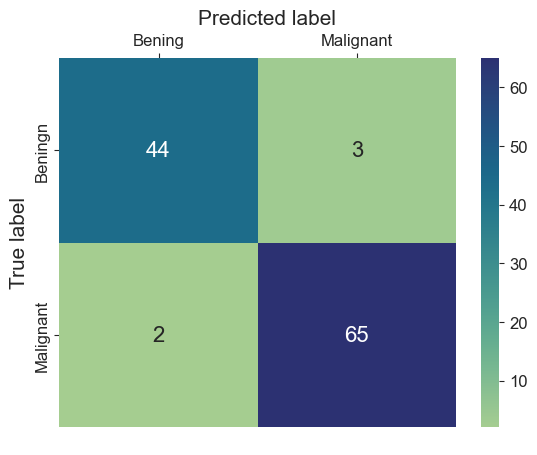

In [7]:
# plotting parameters
sns.set_style('whitegrid')
sns.set_palette('muted')
plt.rc('xtick', labelsize=12)  # Set x-tick label size
plt.rc('ytick', labelsize=12)  # Set y-tick label size

# calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            annot_kws={"fontsize":16},
            xticklabels=['Bening','Malignant'],
            yticklabels=['Beningn','Malignant'],
            cmap='crest')
plt.ylabel('True label', fontsize=15)
ax.set(xlabel=" ", ylabel="True label")
ax.xaxis.tick_top()
ax.yaxis.tick_left()

plt.gca().figure.text(0.45, 0.95, 'Predicted label', ha='center', fontsize=15)
plt.show()